# MOwNiT 
## Laboratorium 5

### 1. Tablice wielowymiarowe i mno≈ºenie macierzy w Julii

#### Wersja naiwna

In [1]:
# mno≈ºenie macierzy - wersja naiwna
function naive_multiplication(A,B)
    C = zeros(Float64, size(A,1), size(B,2))
    for i=1:size(A,1)
        for j=1:size(B,2)
            for k=1:size(A,2)
                C[i,j] = C[i,j] + A[i,k]*B[k,j]
            end
        end
    end
    C
end

naive_multiplication (generic function with 1 method)

#### Wersja ulepszona

In [2]:
# poprawiona funkcja korzytajƒÖca z powy≈ºszego oraz z faktu, ≈ºe
# mo≈ºna zmieniaƒá kolejno≈õƒá operacji dodawania (a co za tym idzie kolejnosc petli).
function better_multiplication(A, B)
    C = zeros(Float64, size(A,1), size(B,2))
    for j=1:size(B,2)
        for k=1:size(A,2)
            for i=1:size(A,1)
                C[i,j] = C[i,j] + A[i,k]*B[k,j]
            end
        end
    end
    C
end

better_multiplication (generic function with 1 method)

#### Por√≥wnanie wersji

In [3]:
function naive_time(A,B)
    @elapsed naive_multiplication(A,B)
end

function better_time(A,B)
    @elapsed better_multiplication(A, B)
end

function blas_time(A,B)
    @elapsed A*B
end

blas_time (generic function with 1 method)

In [4]:
using DataFrames
df = DataFrame(length = Int64[], version = String[], time = Float64[])

r = 100:100:1000
for i = r
    for j = 1:10
        A = rand(i,i)
        B = rand(i,i)
        push!(df, [i "naive" naive_time(A,B)])
        push!(df, [i "better" better_time(A,B)])
        push!(df, [i "blas" blas_time(A,B)])
    end
end

In [5]:
df

300√ó3 DataFrame
 Row ‚îÇ length  version  time      
     ‚îÇ Int64   String   Float64   
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
   1 ‚îÇ    100  naive    0.0026672
   2 ‚îÇ    100  better   0.0010339
   3 ‚îÇ    100  blas     0.003341
   4 ‚îÇ    100  naive    0.0027339
   5 ‚îÇ    100  better   0.0010852
   6 ‚îÇ    100  blas     0.0006972
   7 ‚îÇ    100  naive    0.0023791
   8 ‚îÇ    100  better   0.0009657
   9 ‚îÇ    100  blas     0.0006348
  10 ‚îÇ    100  naive    0.0028259
  11 ‚îÇ    100  better   0.0012754
  ‚ãÆ  ‚îÇ   ‚ãÆ        ‚ãÆ         ‚ãÆ
 291 ‚îÇ   1000  blas     0.027094
 292 ‚îÇ   1000  naive    5.05609
 293 ‚îÇ   1000  better   1.39892
 294 ‚îÇ   1000  blas     0.0218829
 295 ‚îÇ   1000  naive    4.18659
 296 ‚îÇ   1000  better   1.94635
 297 ‚îÇ   1000  blas     0.024259
 298 ‚îÇ   1000  naive    6.07672
 299 ‚îÇ   1000  better   3.04308
 300 ‚îÇ   1000  blas     0.0331221
                  279 rows omitted

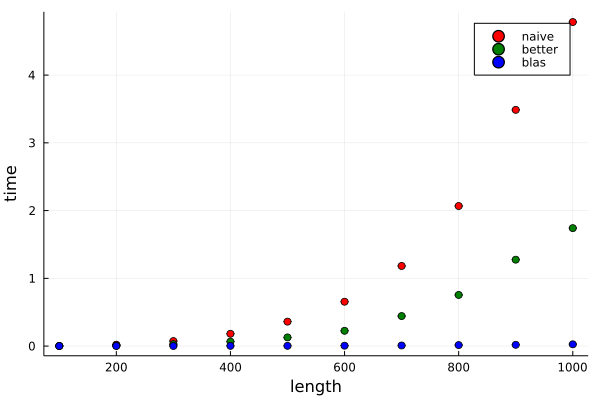

In [6]:
dfgrouped = groupby(df, [:length, :version])
using Statistics
using Plots
df_to_plot = combine(dfgrouped, "time" => mean, "time" => std)

scatter([ df_to_plot[df_to_plot[:,2] .== "naive", :].length df_to_plot[df_to_plot[:,2] .== "better", :].length df_to_plot[df_to_plot[:,2] .== "blas", :].length],
    [ df_to_plot[df_to_plot[:,2] .== "naive", :].time_mean  df_to_plot[df_to_plot[:,2] .== "better", :].time_mean df_to_plot[df_to_plot[:,2] .== "blas", :].time_mean ],
    colour = [:red :green :blue],
    yerr = df_to_plot.time_std,
    label = [ "naive" "better" "blas"],
    xlab = "length",
    ylab = "time"
)

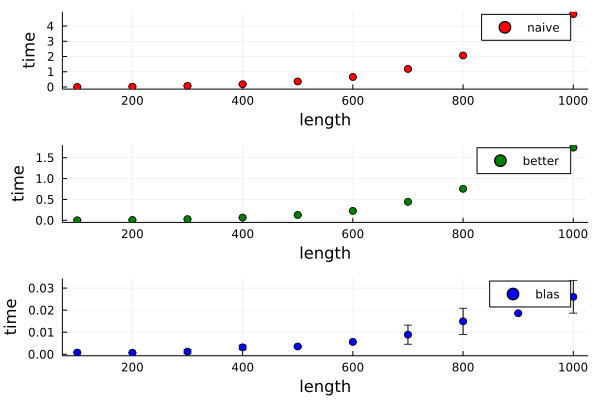

In [7]:
scatter([ df_to_plot[df_to_plot[:,2] .== "naive", :].length df_to_plot[df_to_plot[:,2] .== "better", :].length df_to_plot[df_to_plot[:,2] .== "blas", :].length],
    [ df_to_plot[df_to_plot[:,2] .== "naive", :].time_mean  df_to_plot[df_to_plot[:,2] .== "better", :].time_mean df_to_plot[df_to_plot[:,2] .== "blas", :].time_mean ],
    colour = [:red :green :blue],
    yerr = df_to_plot.time_std,
    label = [ "naive" "better" "blas"],
    xlab = "length",
    ylab = "time",
    layout = (3,1)
)

### 2. C

```C
#include <stdio.h>
#include <stdlib.h>
#include <string.h>
#include <gsl/gsl_blas.h>

#include <fcntl.h>
#include <unistd.h>
#include <sys/types.h>
#include <sys/stat.h>

#include <time.h>
#include <sys/times.h>
#include <sys/resource.h>
clock_t start, end;
struct tms st_cpu, en_cpu;

void start_time(){ start = times(&st_cpu);}
void end_time(){ end = times(&en_cpu);}

float calculate_time(){
    int clock_tics = sysconf(_SC_CLK_TCK);
    double real_time;
    real_time = (double ) (end - start)/ clock_tics;
    return real_time;
}

void naive_multiplication(double **A, double **B, double **C, int n){
    for (int i = 0; i < n; ++i)
        for (int j = 0; j < n; ++j)
            for (int k = 0; k < n; ++k)
                C[i][j] += A[i][k]*B[k][j];
}

void better_multiplication(double **A, double **B, double **C, int n){
    for (int i = 0; i < n; ++i)
        for (int k = 0; k < n; ++k)
            for (int j = 0; j < n; ++j)
                C[i][j] += A[i][k]*B[k][j];
}

double **create_matrix(int n){
    double **A = calloc(n, sizeof(double *));
    for (int i = 0; i < n; ++i) {
        A[i] = calloc(n, sizeof(double));
        for (int j = 0; j < n; ++j) {
            A[i][j] = ((double)rand()/(double)(RAND_MAX)) * 5.0;
        }
    }
    return A;
}

double **create_matrix_zeros(int n){
    double **A = calloc(n, sizeof(double *));
    for (int i = 0; i < n; ++i) {
        A[i] = calloc(n, sizeof(double ));
        for (int j = 0; j < n; ++j) {
            A[i][j] = 0.0;
        }
    }
    return A;
}

void free_matrix(double **A, int n){
    for (int i = 0; i < n; ++i) {
        free(A[i]);
    }
    free(A);
}

int main (void)
{
    srand((unsigned int)time(NULL));

    FILE * file;
    file = fopen("dataC.csv", "w");

    fprintf(file,"length,t,time");

    float time;
    for (int i = 100; i <= 1000; i += 100) {
        for (int j = 0; j < 10; ++j) {
            double **A, **B, **C;
            A = create_matrix(i);
            B = create_matrix(i);
            C = create_matrix_zeros(i);

            //test naive
            start_time();
            naive_multiplication(A,B,C,i);
            end_time();
            time = calculate_time();

            fprintf(file,"\n%d,%s,%f",i,"n",time);

            free_matrix(C,i);
            C = create_matrix_zeros(i);
            
            //test better
            start_time();
            better_multiplication(A,B,C,i);
            end_time();
            time = calculate_time();

            fprintf(file,"\n%d,%s,%f",i,"i",time);

            free_matrix(A,i);
            free_matrix(B,i);
            free_matrix(C,i);

            //test lib function
            double *a = calloc(i*i, sizeof(double));
            double *b = calloc(i*i, sizeof(double));
            double *c = calloc(i*i, sizeof(double));
            for (int k = 0; k < i*i; ++k) {
                a[i] = ((double)rand()/(double)(RAND_MAX)) * 5.0;
                b[i] = ((double)rand()/(double)(RAND_MAX)) * 5.0;
                c[i] = 0.0;
            }
            gsl_matrix_view A2 = gsl_matrix_view_array(a,i,i);
            gsl_matrix_view B2 = gsl_matrix_view_array(b,i,i);
            gsl_matrix_view C2 = gsl_matrix_view_array(c,i,i);
            start_time();
            gsl_blas_dgemm (CblasNoTrans, CblasNoTrans,
                            1.0, &A2.matrix, &B2.matrix,
                            0.0, &C2.matrix);
            end_time();
            time = calculate_time();
            fprintf(file,"\n%d,%s,%f",i,"b",time);

            free(a);
            free(b);
            free(c);
        }
    }
    fclose(file);

    return 0;
}
```

In [97]:
using CSV
data_frame = CSV.read("dataC.csv", delim=",",DataFrame)

300√ó3 DataFrame
 Row ‚îÇ length  t        time    
     ‚îÇ Int64   String1  Float64 
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
   1 ‚îÇ    100  n           0.0
   2 ‚îÇ    100  i           0.01
   3 ‚îÇ    100  b           0.0
   4 ‚îÇ    100  n           0.0
   5 ‚îÇ    100  i           0.01
   6 ‚îÇ    100  b           0.0
   7 ‚îÇ    100  n           0.01
   8 ‚îÇ    100  i           0.0
   9 ‚îÇ    100  b           0.0
  10 ‚îÇ    100  n           0.0
  11 ‚îÇ    100  i           0.01
  ‚ãÆ  ‚îÇ   ‚ãÆ        ‚ãÆ        ‚ãÆ
 291 ‚îÇ   1000  b           0.01
 292 ‚îÇ   1000  n           6.36
 293 ‚îÇ   1000  i           4.24
 294 ‚îÇ   1000  b           0.01
 295 ‚îÇ   1000  n           6.25
 296 ‚îÇ   1000  i           3.98
 297 ‚îÇ   1000  b           0.01
 298 ‚îÇ   1000  n           6.57
 299 ‚îÇ   1000  i           4.06
 300 ‚îÇ   1000  b           0.0
                279 rows omitted

In [98]:
data_frame_grouped = groupby(data_frame, [:length, :t])

GroupedDataFrame with 30 groups based on keys: length, t
First Group (10 rows): length = 100, t = "n"
 Row ‚îÇ length  t        time    
     ‚îÇ Int64   String1  Float64 
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
   1 ‚îÇ    100  n           0.0
   2 ‚îÇ    100  n           0.0
   3 ‚îÇ    100  n           0.01
   4 ‚îÇ    100  n           0.0
   5 ‚îÇ    100  n           0.01
   6 ‚îÇ    100  n           0.01
   7 ‚îÇ    100  n           0.01
   8 ‚îÇ    100  n           0.01
   9 ‚îÇ    100  n           0.0
  10 ‚îÇ    100  n           0.0
‚ãÆ
Last Group (10 rows): length = 1000, t = "b"
 Row ‚îÇ length  t        time    
     ‚îÇ Int64   String1  Float64 
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
   1 ‚îÇ   1000  b           0.0
   2 ‚îÇ   1000  b           0.01
   3 ‚îÇ   1000  b           0.01
   4 ‚îÇ   1000  b           0.01
   5 ‚îÇ   1000  b           0.01
   6 ‚îÇ   1000  b           0.01
   7 ‚îÇ   1000  b           0.01
   8 ‚îÇ   1000  b           0.01
   9 ‚îÇ   1000  b           0.01
  10 ‚îÇ   1000  b           0.0

In [99]:
data_frame_to_plot = combine(data_frame_grouped, "time" => mean, "time" => std)

30√ó4 DataFrame
 Row ‚îÇ length  t        time_mean  time_std   
     ‚îÇ Int64   String1  Float64    Float64    
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
   1 ‚îÇ    100  n            0.005  0.00527046
   2 ‚îÇ    100  i            0.006  0.00516398
   3 ‚îÇ    100  b            0.0    0.0
   4 ‚îÇ    200  n            0.044  0.00516398
   5 ‚îÇ    200  i            0.038  0.00632456
   6 ‚îÇ    200  b            0.0    0.0
   7 ‚îÇ    300  n            0.131  0.00737865
   8 ‚îÇ    300  i            0.107  0.00948683
   9 ‚îÇ    300  b            0.0    0.0
  10 ‚îÇ    400  n            0.297  0.0105935
  11 ‚îÇ    400  i            0.251  0.00737865
  ‚ãÆ  ‚îÇ   ‚ãÆ        ‚ãÆ         ‚ãÆ          ‚ãÆ
  21 ‚îÇ    700  b            0.003  0.00483046
  22 ‚îÇ    800  n            3.175  0.1835
  23 ‚îÇ    800  i            2.052  0.0402216
  24 ‚îÇ    800  b            0.004  0.00516398
  25 ‚îÇ    900  n            4.718  0.162604
  26 ‚îÇ    900  i            3.021  0.143174
  27 ‚îÇ    900  b            0.005  0.00527046
  28 ‚îÇ   1000  n            6.506  0.334305
  29 ‚îÇ   1000  i            4.058  0.114872
  30 ‚îÇ   1000  b            0.008  0.00421637
                                9 rows omitted

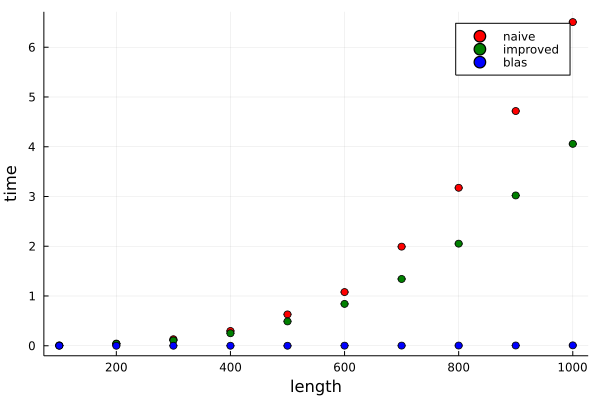

In [100]:
scatter([ data_frame_to_plot[data_frame_to_plot[:,2] .== "n", :].length data_frame_to_plot[data_frame_to_plot[:,2] .== "i", :].length data_frame_to_plot[data_frame_to_plot[:,2] .== "b", :].length],
    [ data_frame_to_plot[data_frame_to_plot[:,2] .== "n", :].time_mean  data_frame_to_plot[data_frame_to_plot[:,2] .== "i", :].time_mean data_frame_to_plot[data_frame_to_plot[:,2] .== "b", :].time_mean ],
    colour = [:red :green :blue],
    yerr = data_frame_to_plot.time_std,
    label = [ "naive" "improved" "blas"],
    xlab = "length",
    ylab = "time"
)

### 3. Wielomiany i aproksymacja ≈õredniokwadratowa

In [110]:
using Pkg
using Polynomials

### Julia - aproximation 

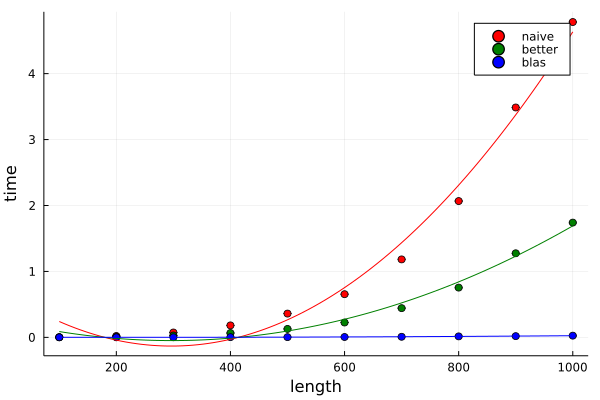

In [107]:
scatter([ df_to_plot[df_to_plot[:,2] .== "naive", :].length df_to_plot[df_to_plot[:,2] .== "better", :].length df_to_plot[df_to_plot[:,2] .== "blas", :].length],
    [ df_to_plot[df_to_plot[:,2] .== "naive", :].time_mean  df_to_plot[df_to_plot[:,2] .== "better", :].time_mean df_to_plot[df_to_plot[:,2] .== "blas", :].time_mean ],
    colour = [:red :green :blue],
    yerr = df_to_plot.time_std,
    label = [ "naive" "better" "blas"],
    xlab = "length",
    ylab = "time"
)

xs = df_to_plot[df_to_plot[:,2] .== "naive", 1]
ys_naive = df_to_plot[df_to_plot[:,2] .== "naive", 3]
ys_better = df_to_plot[df_to_plot[:,2] .== "better", 3]
ys_blas = df_to_plot[df_to_plot[:,2] .== "blas", 3]

fit_naive = fit(xs, ys_naive, 2)
plot!(fit_naive,  
    extrema(xs)..., 
    label = "",
    color = "red"
)

fit_better = fit(xs, ys_better, 2)
plot!(fit_better,  
    extrema(xs)..., 
    label = "",
    color = "green"
)

fit_blas = fit(xs, ys_blas, 2)
plot!(fit_blas,  
    extrema(xs)..., 
    label = "",
    color = "blue"
)

### C - aproximation 

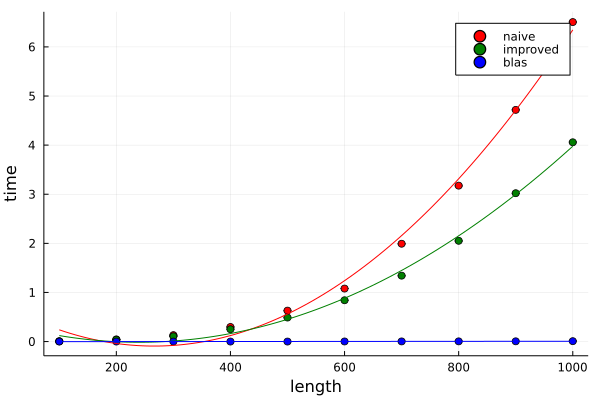

In [109]:
scatter([ data_frame_to_plot[data_frame_to_plot[:,2] .== "n", :].length data_frame_to_plot[data_frame_to_plot[:,2] .== "i", :].length data_frame_to_plot[data_frame_to_plot[:,2] .== "b", :].length],
    [ data_frame_to_plot[data_frame_to_plot[:,2] .== "n", :].time_mean  data_frame_to_plot[data_frame_to_plot[:,2] .== "i", :].time_mean data_frame_to_plot[data_frame_to_plot[:,2] .== "b", :].time_mean ],
    colour = [:red :green :blue],
    yerr = data_frame_to_plot.time_std,
    label = [ "naive" "improved" "blas"],
    xlab = "length",
    ylab = "time"
)

xs = data_frame_to_plot[data_frame_to_plot[:,2] .== "n", 1]
ys_naive = data_frame_to_plot[data_frame_to_plot[:,2] .== "n", 3]
ys_better = data_frame_to_plot[data_frame_to_plot[:,2] .== "i", 3]
ys_blas = data_frame_to_plot[data_frame_to_plot[:,2] .== "b", 3]

fit_polynomial_naive = fit(xs, ys_naive, 2)
plot!(fit_polynomial_naive,  
    extrema(xs)..., 
    label = "",
    color = "red"
)

fit_polynomial_better = fit(xs, ys_better, 2)
plot!(fit_polynomial_better,  
    extrema(xs)..., 
    label = "",
    color = "green"
)

fit_polynomial_blas = fit(xs, ys_blas, 1)
plot!(fit_polynomial_blas,  
    extrema(xs)..., 
    label = "",
    color = "blue"
)

### 4. Zniwelowanie efektu Rungego poprzez u≈ºycie wielomian√≥w Czebyszewa

Rozwa≈ºmy funkcjƒô: \
$f(x) = \frac{1}{1+25x^{2}}$

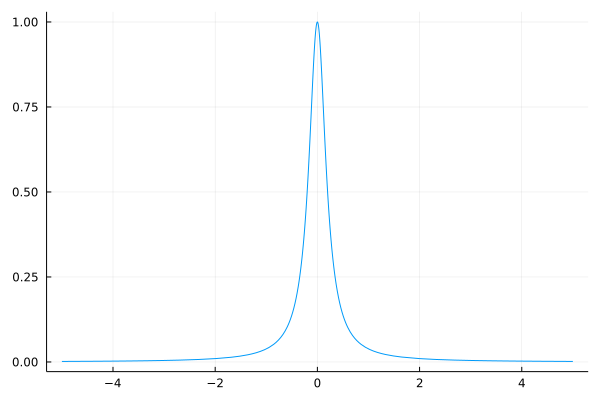

In [76]:
range = -5:1:5
f(x) = 1/(1+ 25*x^2)
plot(f,extrema(range)...,label="")

In [77]:
y_aprox = map(x -> 1/(1+25*x^2), range)
polynomial_aprox = fit(range,y_aprox,10)

Polynomial(0.9999999999999999 - 5.551115123125783e-17*x - 1.4017022018886478*x^2 - 3.885780586188048e-16*x^3 + 0.5038241865915477*x^4 - 1.5265566588595902e-16*x^5 - 0.06720281294416734*x^6 + 5.204170427930421e-18*x^7 + 0.0036079175300223593*x^8 + 1.0842021724855044e-19*x^9 - 6.555082721697598e-5*x^10)

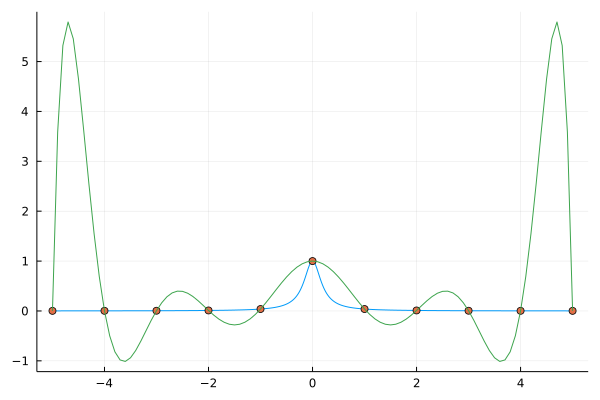

In [78]:
scatter!(range, y_aprox, label="")
plot!(polynomial_aprox,  extrema(range)..., label="")

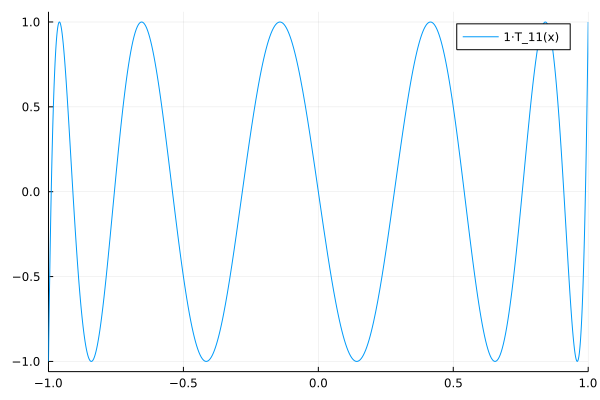

In [79]:
chebyshev_base = [0,0,0,0,0,0,0,0,0,0,0,1]
chebyshev_poly = ChebyshevT(chebyshev_base)
plot(chebyshev_poly)

In [80]:
che_poly_zeros = Polynomials.roots(chebyshev_poly)
che_poly_zeros = 5 * che_poly_zeros
y_aprox_che = map(x -> 1/(1+25*x^2), che_poly_zeros)
poly_aprox_che = fit(che_poly_zeros,y_aprox_che,10)

Polynomial(1.0 + 1.4710455076283324e-15*x - 0.7819469334295069*x^2 - 5.273559366969494e-16*x^3 + 0.1742308824812534*x^4 + 1.6653345369377348e-16*x^5 - 0.015896952501883936*x^6 + 0.0006352311044059432*x^8 + 4.743384504624082e-20*x^9 - 9.234352440848136e-6*x^10)

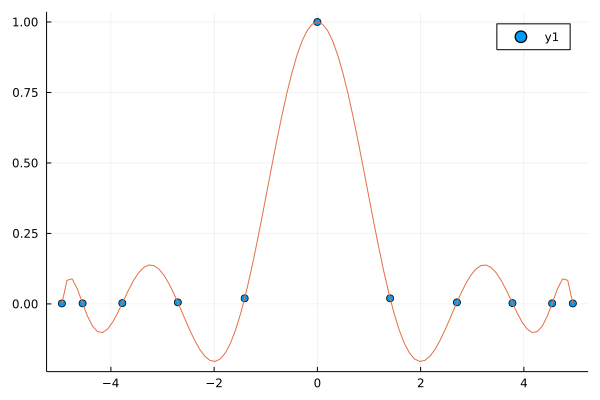

In [81]:
scatter(che_poly_zeros, y_aprox_che)
plot!(poly_aprox_che,  extrema(che_poly_zeros)..., label="")

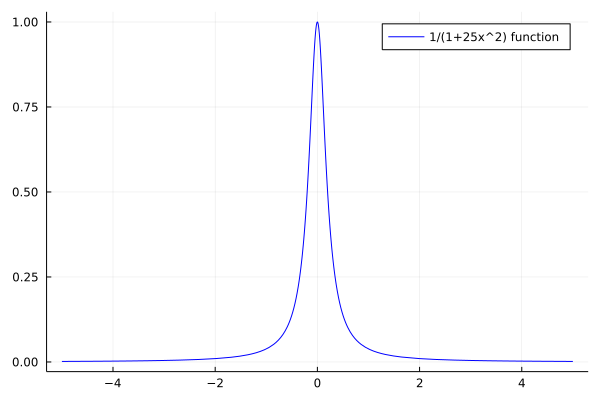

In [84]:
plot(f,  extrema(range)..., 
    label="1/(1+25x^2) function",
    color = "blue"
)

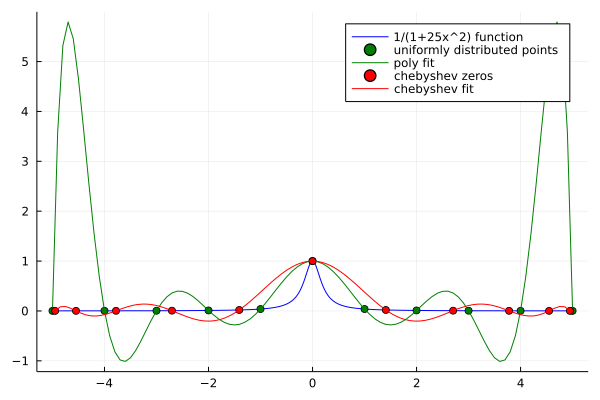

In [85]:
plot(f,  extrema(range)..., 
    label="1/(1+25x^2) function",
    color = "blue"
)
scatter!(range, y_aprox, 
    label="uniformly distributed points",
    color = "green"
)
plot!(polynomial_aprox,  extrema(range)..., 
    label="poly fit",
    color = "green"
)
scatter!(che_poly_zeros, y_aprox_che, 
    label="chebyshev zeros",
    color = "red"
)
plot!(poly_aprox_che,  extrema(che_poly_zeros)..., 
    label="chebyshev fit",
    color = "red"
)

Dziƒôki wyboru punkt√≥w metodƒÖ Chebysheva zanika efekt Rungego - widoczny na skrajach przedzia≈Çu.

### 5. Pade vs Taylor 

In [88]:
using TaylorSeries

In [89]:
t = Taylor1(Float64, 10)
myfun(x) = log(1+x)/x
p = myfun(t)

 1.0 - 0.5 t + 0.3333333333333333 t¬≤ - 0.25 t¬≥ + 0.2 t‚Å¥ - 0.16666666666666666 t‚Åµ + 0.14285714285714285 t‚Å∂ - 0.125 t‚Å∑ + 0.1111111111111111 t‚Å∏ - 0.1 t‚Åπ + ùí™(t¬π‚Å∞)

In [90]:
p = Polynomial(p.coeffs)

Polynomial(1.0 - 0.5*x + 0.3333333333333333*x^2 - 0.25*x^3 + 0.2*x^4 - 0.16666666666666666*x^5 + 0.14285714285714285*x^6 - 0.125*x^7 + 0.1111111111111111*x^8 - 0.1*x^9)

In [91]:
pade = Polynomials.PolyCompat.PadeApproximation.Pade(p, 2, 2)

Polynomials.PolyCompat.PadeApproximation.Pade{Float64, Float64}(Polynomial(1.0 + 0.6999999999999987*x + 0.03333333333333298*x^2), Polynomial(1.0 + 1.1999999999999986*x + 0.29999999999999905*x^2), :x)

In [92]:
fieldnames(typeof(pade))

(:p, :q, :var)

In [94]:
pade_f(x) = pade.p(x) / pade.q(x)
taylor_f(x) = p(x)

taylor_f (generic function with 1 method)

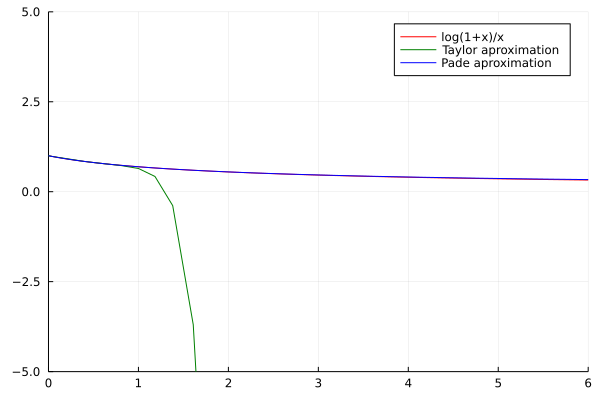

In [96]:
plot(myfun,
    xlims = (0,6),
    ylims = (-5,5),
    label="log(1+x)/x",
    color = "red"
)
plot!(taylor_f,
    label="Taylor aproximation",
    color = "green"
)
plot!(pade_f,
    label="Pade aproximation",
    color = "blue"
)